In [3]:
from helpers import *
import matplotlib.pyplot as plt

data = get_data("data/cdr.csv")
analyzed_data = data[(data['DATE'] >= '2022-01-01') & (data['DATE'] < '2023-01-01')]

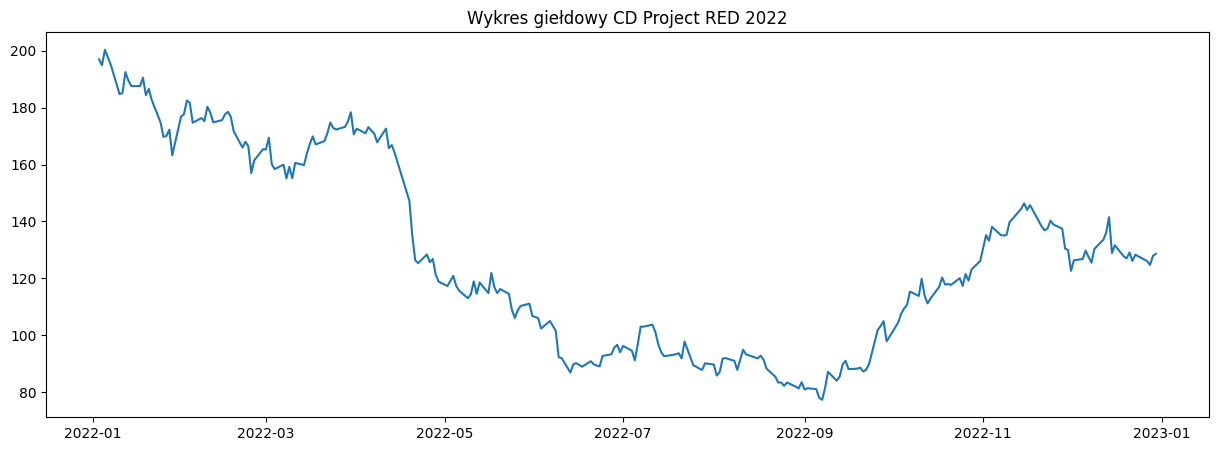

In [4]:
plt.figure(figsize=(15,5))
plt.plot(analyzed_data["DATE"].values, analyzed_data["VALUE"].values)
plt.title("Wykres giełdowy CD Project RED 2022")
plt.show()

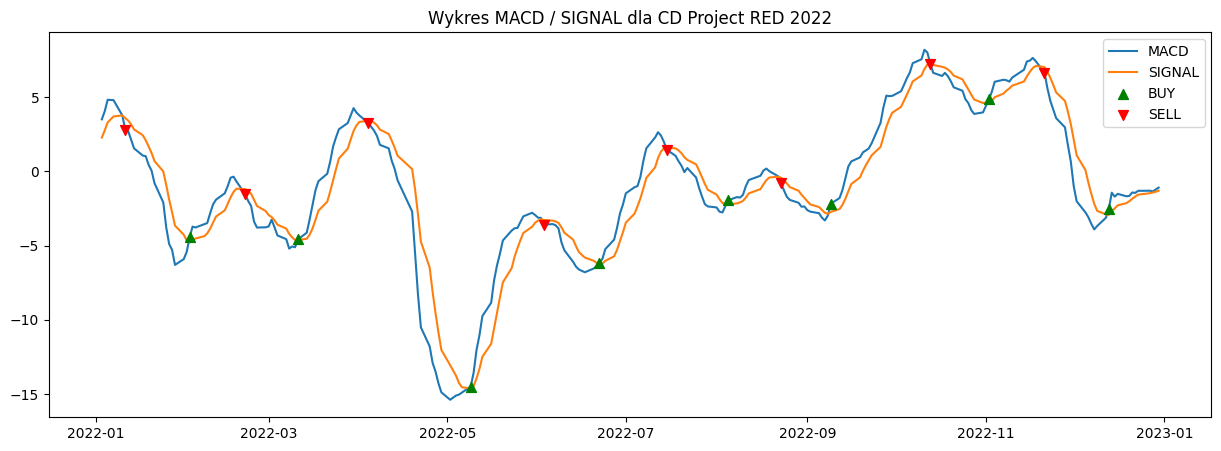

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(analyzed_data["DATE"].values, analyzed_data["MACD"].values)
plt.plot(analyzed_data["DATE"].values, analyzed_data["SIGNAL"].values)
plt.scatter(analyzed_data[analyzed_data["ACTION"] == 'BUY']["DATE"].values, analyzed_data[analyzed_data["ACTION"] == 'BUY']["MACD"].values, color='green', marker='^', s=50, zorder=15, label='BUY')
plt.scatter(analyzed_data[analyzed_data["ACTION"] == 'SELL']["DATE"].values, analyzed_data[analyzed_data["ACTION"] == 'SELL']["MACD"].values, color='red', marker='v', s=50, zorder=15, label='SELL')
plt.legend(['MACD', 'SIGNAL', 'BUY', 'SELL'])
plt.title("Wykres MACD / SIGNAL dla CD Project RED 2022")
plt.show()

In [12]:
print("Dla początkowych 1000 jednostek kapitału zysk wynosi: {}".format(simulate(analyzed_data, 1000)))

Dla początkowych 1000 jednostek kapitału zysk wynosi: -8690.967999999993
